# SHAP Values

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('default')

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
from scipy.special import softmax

In [4]:
import shap 

### Functions

In [5]:
def print_feature_importances_random_forest(random_forest_model):
    
    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    random_forest_model -> The sklearn.ensemble.RandomForestRegressor or RandomForestClassifier trained model
    '''
    
    # Fetch the feature importances and feature names
    importances = random_forest_model.feature_importances_
    features = random_forest_model.feature_names_in_
    
    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

In [6]:
def print_feature_importances_shap_values(shap_values, features):
    
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''

    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
        
    # Calculates the normalized version
    importances_norm = softmax(importances)

    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [7]:
def evaluate_regression(y, y_pred):
    
    '''
    Prints the most common evaluation metrics for regression
    '''
    
    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)
    
    print('Regression result')
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")

## Regression

### Import a regression dataset

In [8]:
from sklearn.datasets import fetch_california_housing

In [9]:
dataset = fetch_california_housing(as_frame = True)

In [10]:
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [11]:
# Gets the independent variables
X = dataset['data']
X.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [12]:
# Checks the shape of the data
X.shape

(20640, 8)

In [13]:
# Gets the dependent variable (the target)
y = dataset['target']
y.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Create a simple regression

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()

In [16]:
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# Evaluates the model
y_pred = model.predict(X_test)
evaluate_regression(y_test, y_pred)

Regression result
MAE: 0.33
MSE: 0.25
RMSE: 0.50
R2: 0.81


In [18]:
# Prints the feature importances
print_feature_importances_random_forest(model)

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'

### SHAP values

In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

In [ ]:
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 4129it [19:03,  3.59it/s]                                                                             


In [ ]:
shap_values

NameError: name 'shap_values' is not defined

### SHAP global evaluation

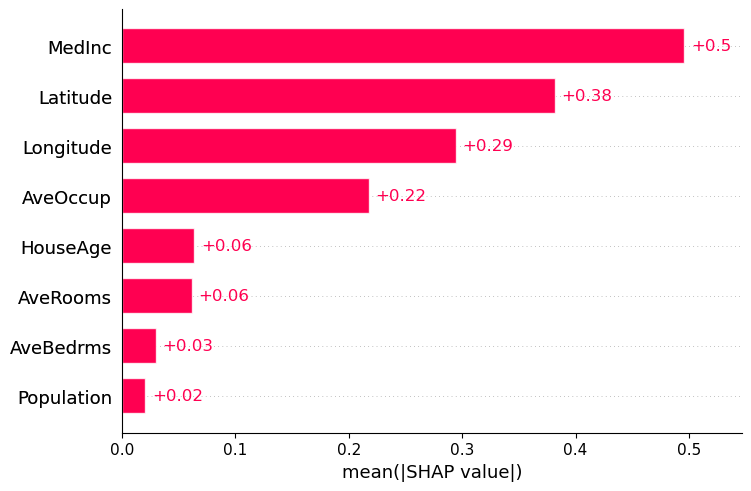

In [ ]:
# Plots this view
shap.plots.bar(shap_values)

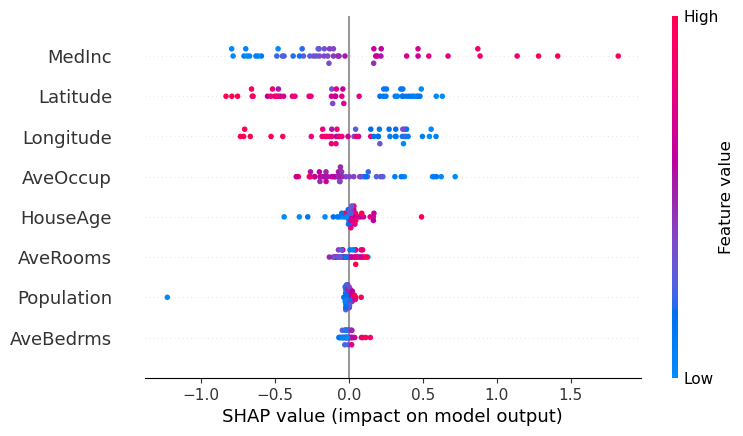

In [ ]:
# Plots the beeswarm
shap.plots.beeswarm(shap_values.sample(50))

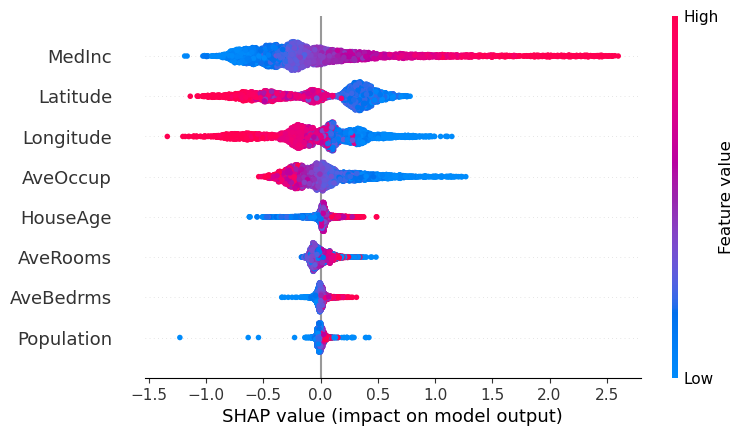

In [ ]:
shap.summary_plot(shap_values)

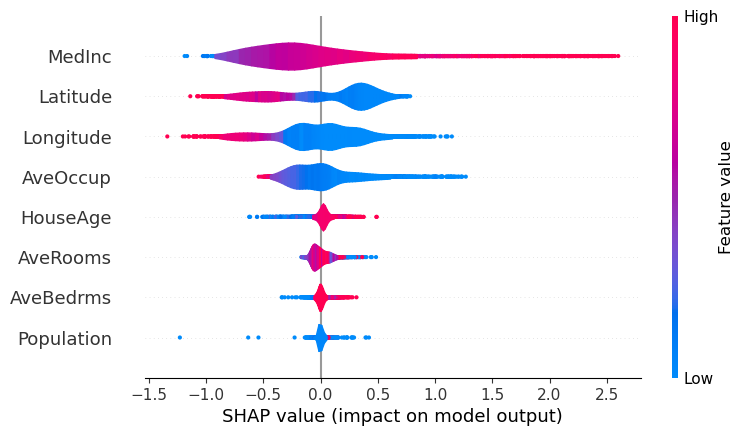

In [ ]:
# Violin plot
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
# Prints the SHAP feature importances
print_feature_importances_shap_values(shap_values, X_test.columns)

MedInc -> 0.4957 (softmax = 0.1663)
Latitude -> 0.3819 (softmax = 0.1484)
Longitude -> 0.2942 (softmax = 0.1359)
AveOccup -> 0.2180 (softmax = 0.1260)
HouseAge -> 0.0638 (softmax = 0.1080)
AveRooms -> 0.0615 (softmax = 0.1077)
AveBedrms -> 0.0297 (softmax = 0.1043)
Population -> 0.0208 (softmax = 0.1034)


### SHAP local evaluation
For a single example

In [ ]:
shap.plots.bar(shap_values[0])

NameError: name 'shap_values' is not defined

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=10)

NameError: name 'shap_values' is not defined

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])